#### Problem Statement : When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

#### If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

#### If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

In [1]:
####We can adjust Jupyter with just a pinch of code so that it saved the output directly to a file on the server. By doing so, even if the network connectivity cuts out the server will still have the output stored to it. It’s not perfect–in an ideal world this output would still show up in the notebook itself, but it’s an improvement to have them stored somewhere instead of lost. Put this code at the top of your long-running notebook:

import warnings
warnings.filterwarnings('ignore')
import sys
import logging

so = open("data.log", 'w', 10)
sys.stdout.echo = so
sys.stderr.echo = so

get_ipython().log.handlers[0].stream = so
get_ipython().log.setLevel(logging.INFO)


In [2]:
### 1st Step: we will import the important libraries of python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

In [3]:
#2nd step we will load the csv file which contains the data of application, we will analyse the data of csv file one by one so we will upload file accordingly
df0 = pd.read_csv("C://Users//dell//Desktop//COURSE//Data Toolkit//Credit EDA Case Study//application_data.csv")
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Now we will check the data structure to get primary insights and information about dataset

In [4]:
df0.shape

(307511, 122)

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### After seeing the data structure, we will check the missing values in data sets if any

In [7]:
#to check the missing count in each column
df0.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### Now we are not getting clear idea about missing values so we will find the % of missing value in each column

In [8]:
round(100*df0.isnull().sum()/len(df0),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

### Now we will remove the high missing % data columns, for that we will take 50% as threshold value

In [9]:
df0 = df0.loc[:, 100*df0.isnull().sum()/len(df0) < 50]

In [10]:
df0.shape

(307511, 81)

#### No again we will crosscheck the missing % to verify the changes

In [11]:
round(100*df0.isnull().sum()/len(df0),5)

SK_ID_CURR                       0.00000
TARGET                           0.00000
NAME_CONTRACT_TYPE               0.00000
CODE_GENDER                      0.00000
FLAG_OWN_CAR                     0.00000
FLAG_OWN_REALTY                  0.00000
CNT_CHILDREN                     0.00000
AMT_INCOME_TOTAL                 0.00000
AMT_CREDIT                       0.00000
AMT_ANNUITY                      0.00390
AMT_GOODS_PRICE                  0.09040
NAME_TYPE_SUITE                  0.42015
NAME_INCOME_TYPE                 0.00000
NAME_EDUCATION_TYPE              0.00000
NAME_FAMILY_STATUS               0.00000
NAME_HOUSING_TYPE                0.00000
REGION_POPULATION_RELATIVE       0.00000
DAYS_BIRTH                       0.00000
DAYS_EMPLOYED                    0.00000
DAYS_REGISTRATION                0.00000
DAYS_ID_PUBLISH                  0.00000
FLAG_MOBIL                       0.00000
FLAG_EMP_PHONE                   0.00000
FLAG_WORK_PHONE                  0.00000
FLAG_CONT_MOBILE

### now we will take some columns one by one to impute the values in it

In [12]:
df0.AMT_ANNUITY.head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [13]:
df0.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

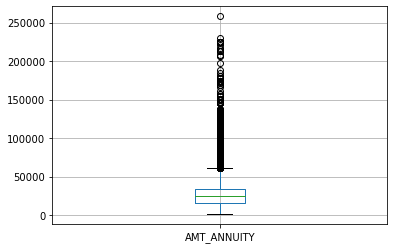

In [14]:
df0.boxplot(column = ["AMT_ANNUITY"])
plt.show()

### from boxplot it is clear that we have outliers so we will impute with median

In [15]:
df0.AMT_ANNUITY.median()

24903.0

In [16]:
df0['AMT_ANNUITY'].fillna(df0['AMT_ANNUITY'].median(), inplace=True)

In [17]:
df0.AMT_ANNUITY.isnull().sum()

0

In [18]:
#2nd column for imputing values AMT_GOODS_PRICE
df0.AMT_GOODS_PRICE.head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [19]:
df0.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

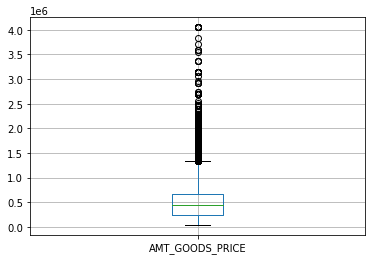

In [20]:
df0.boxplot(column = ["AMT_GOODS_PRICE"])
plt.show()

from boxplot it is clear that we have outliers so we will impute with median

In [21]:
df0['AMT_GOODS_PRICE'].fillna(df0['AMT_GOODS_PRICE'].median(), inplace=True)
df0.AMT_GOODS_PRICE.isnull().sum()

0

In [22]:
##3rd column to impute values NAME_TYPE_SUITE
df0.NAME_TYPE_SUITE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: NAME_TYPE_SUITE
Non-Null Count   Dtype 
--------------   ----- 
306219 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [23]:
df0.NAME_TYPE_SUITE.isnull().sum()

1292

this is categorical value so we will use mode to impute the values

In [24]:
df0.NAME_TYPE_SUITE.mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [25]:
df0["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

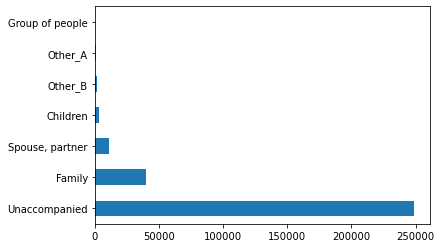

In [26]:
df0["NAME_TYPE_SUITE"].value_counts().plot.barh()
plt.show()

### So we will fill missing values from mode which is Unaccompanied


In [27]:
df0['NAME_TYPE_SUITE']= df0['NAME_TYPE_SUITE'].fillna(df0['NAME_TYPE_SUITE'].mode()[0])

In [28]:
df0.NAME_TYPE_SUITE.isnull().sum()

0

In [29]:
df0.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [30]:
### 4th column to impute CNT_FAM_MEMBERS
df0.CNT_FAM_MEMBERS.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: CNT_FAM_MEMBERS
Non-Null Count   Dtype  
--------------   -----  
307509 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [31]:
df0.CNT_FAM_MEMBERS.isnull().sum()

2

In [32]:
df0.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

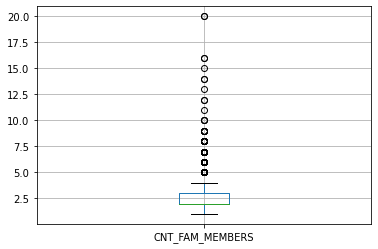

In [33]:
df0.boxplot(column = ["CNT_FAM_MEMBERS"])
plt.show()

In [34]:
df0.CNT_FAM_MEMBERS.median()

2.0

In [35]:
df0['CNT_FAM_MEMBERS'].fillna(df0['CNT_FAM_MEMBERS'].median(), inplace=True)
df0.CNT_FAM_MEMBERS.isnull().sum()

0

In [36]:
###5th column to impute values EXT_SOURCE_2
df0.EXT_SOURCE_2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: EXT_SOURCE_2
Non-Null Count   Dtype  
--------------   -----  
306851 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [37]:
df0.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

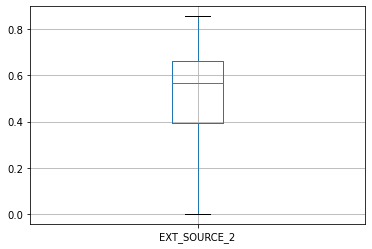

In [38]:
df0.boxplot(column = ["EXT_SOURCE_2"])
plt.show()

### median is tilt toward the outlier so we will use median 

In [39]:
df0['EXT_SOURCE_2'].fillna(df0['EXT_SOURCE_2'].median(), inplace=True)
df0.EXT_SOURCE_2.isnull().sum()

0

In [40]:
df0.nunique().sort_values()

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

### In the dataset there are some negative values so we will change them to positive values because negative values will affect our analysis

In [41]:
df0['DAYS_BIRTH']=df0['DAYS_BIRTH'].abs()
df0['DAYS_EMPLOYED']=df0['DAYS_EMPLOYED'].abs()
df0['DAYS_REGISTRATION']=df0['DAYS_REGISTRATION'].abs()
df0['DAYS_ID_PUBLISH']=df0['DAYS_ID_PUBLISH'].abs()
df0['DAYS_LAST_PHONE_CHANGE']=df0['DAYS_LAST_PHONE_CHANGE'].abs()

In [42]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [43]:
##OCCUPATION_TYPE
df0.OCCUPATION_TYPE.info()               

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: OCCUPATION_TYPE
Non-Null Count   Dtype 
--------------   ----- 
211120 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [44]:
df0.OCCUPATION_TYPE.isnull().sum()

96391

In [45]:
df0.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

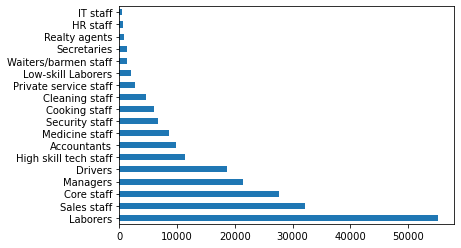

In [46]:
df0["OCCUPATION_TYPE"].value_counts().plot.barh()
plt.show()

In [47]:
df0["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

### Now we will convert some integer columns to categorical columns because they belongs to categorical data type

In [48]:
for col in df0.columns:
    if df0[col].nunique() <= 3:
        df0[col] = df0[col].astype(object)

In [49]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  object 
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

### Now we have checked if any columns with unique count greater than 3 to see if any int/float column is worngly read as object, but there are no any such as of column

# Numerical Column Check

Now we will take 5-6 Numerical columns and perform analysis

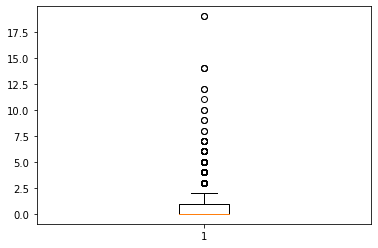

In [50]:
plt.boxplot(df0['CNT_CHILDREN'])
plt.show()

In graph we can see upper fence is far from the highest value in data set so there some outliers

In [51]:
Q1 = df0['CNT_CHILDREN'].quantile(0.25)
Q3 = df0['CNT_CHILDREN'].quantile(0.75)

In [52]:
IQR = Q3 - Q1

In [53]:
upperwhisker=(Q3 + 1.5 * IQR)

In [54]:
#we will take round figure value because childern's can not be 2.5
upperwhisker

2.5

In [55]:
print("The values greater than 2.5 are considered to be outliers".format(upperwhisker))

The values greater than 2.5 are considered to be outliers


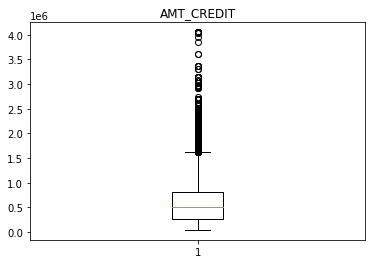

In [56]:
plt.boxplot(df0['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()

In [57]:
Q1 = df0['AMT_CREDIT'].quantile(0.25)
Q3 = df0['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1

In [58]:
upperwhisker=(Q3 + 1.5 * IQR)

In [59]:
upperwhisker

1616625.0

In [60]:
print("The amount credited greater than 1616625.0 can be considered as an outlier".format(upperwhisker))

The amount credited greater than 1616625.0 can be considered as an outlier


In [61]:
df0['AMT_CREDIT'].describe()
df0['AMT_CREDIT'].max()

4050000.0

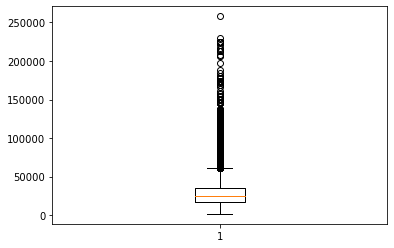

In [62]:
new = df0['AMT_ANNUITY']
filtered = new[~np.isnan(new)]
plt.boxplot(filtered)
plt.show()

In [63]:
Q1 = df0['AMT_ANNUITY'].quantile(0.25)
Q3 = df0['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
upperwhisker=(Q3 + 1.5 * IQR)


In [64]:
upperwhisker

61704.0

In [65]:
print("AMT_ANNUITY count greater than {} is considered to be an outlier".format(upperwhisker))

AMT_ANNUITY count greater than 61704.0 is considered to be an outlier


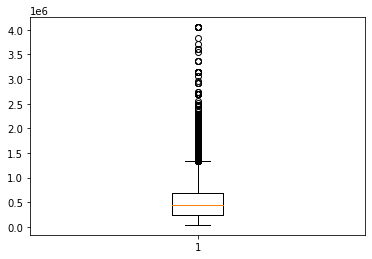

In [66]:
new=df0['AMT_GOODS_PRICE']
filtered = new[~np.isnan(new)]
plt.boxplot(filtered)
plt.show()

In [67]:
Q1 = df0['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = df0['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
upperwhisker=(Q3 + 1.5 * IQR)

In [68]:
upperwhisker

1341000.0

In [69]:
print("AMT_GOODS_PRICE count greater than {} is considered to be an outlier".format(upperwhisker))


AMT_GOODS_PRICE count greater than 1341000.0 is considered to be an outlier


In [70]:
df0.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,

In [71]:
df0.AMT_INCOME_TOTAL.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: AMT_INCOME_TOTAL
Non-Null Count   Dtype  
--------------   -----  
307511 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [72]:
df0.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [73]:
q1=df0['AMT_INCOME_TOTAL'].quantile(0.25)
q2=df0['AMT_INCOME_TOTAL'].quantile(0.50)
q3=df0['AMT_INCOME_TOTAL'].quantile(0.75)
m=df0['AMT_INCOME_TOTAL'].max()


In [74]:
##we will make a busket for the total income column and divide data in 3 category
df0['AMT_INCOME_TOTAL_bin'] = pd.cut(df0['AMT_INCOME_TOTAL'],[q1, q2, q3,m ], labels = ['Low', 'medium', 'High'])

In [75]:
df0.AMT_INCOME_TOTAL_bin.value_counts()

medium    82213
High      71538
Low       53182
Name: AMT_INCOME_TOTAL_bin, dtype: int64

### Same we will do with the amount credit 

In [76]:
q1=df0['AMT_CREDIT'].quantile(0.25)
q2=df0['AMT_CREDIT'].quantile(0.50)
q3=df0['AMT_CREDIT'].quantile(0.75)
m=df0['AMT_CREDIT'].max()


In [77]:
df0['AMT_CREDIT_bin'] = pd.cut(df0['AMT_CREDIT'],[q1, q2, q3,m ], labels = ['Low', 'medium', 'High'])

In [78]:
df0.AMT_CREDIT_bin.value_counts()

medium    77786
High      75876
Low       75428
Name: AMT_CREDIT_bin, dtype: int64

# Analysis Part 

In [79]:
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low


## Now firstly we will check the data imbalance

In [80]:
(100*df0.TARGET.value_counts()/ len(df0))

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

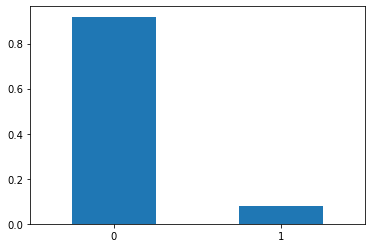

In [81]:
(df0.TARGET.value_counts()/ len(df0)).plot.bar()
plt.xticks(rotation=0)
plt.show()

## So from above graph we can predict that 92 % of data belongs to non default and 8 % belongs to the default

So from above observation we can say that this is not a balanced data set. So we will divide the data set into 2 sets now 

In [82]:
df0_one = df0[df0['TARGET']==1] #for non default
df0_two = df0[df0['TARGET']==0] #for default

now we will perform analysis for both the data set and compare to get insights

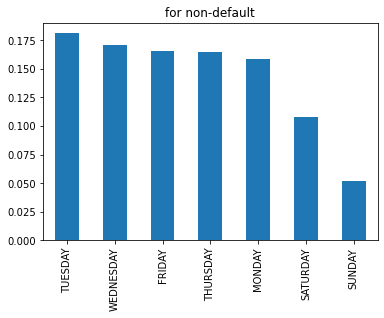

In [83]:
df0_one.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for non-default')
plt.show()

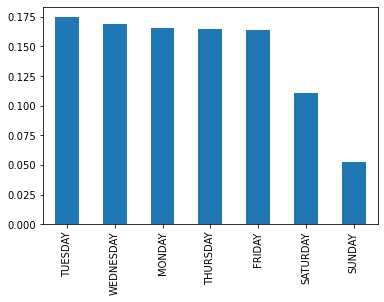

In [84]:
df0_two.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.show()

from above graph we can say that process of application starting is less on weekends.

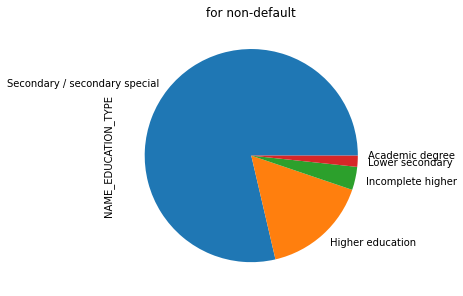

In [85]:
df0_one.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.tight_layout()
plt.title('for non-default')
plt.show()

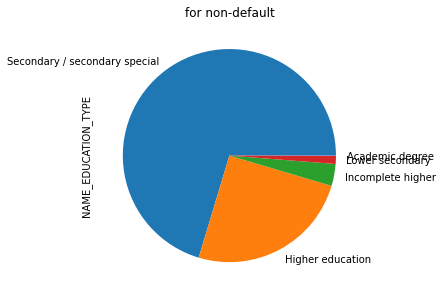

In [86]:
df0_two.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.tight_layout()
plt.title('for non-default')
plt.show()

for both the data set we can say that people having secondary/secondary special education applying loan in higher number and people having acedemic degrees are appling in lesser number

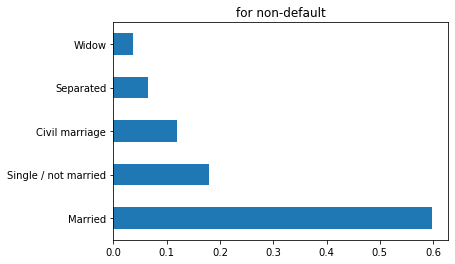

In [87]:
df0_one.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()

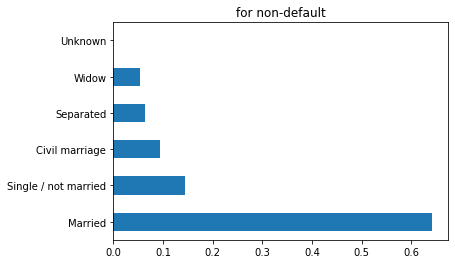

In [88]:
df0_two.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()

from the above graph we can say that married people take more loans compair to any other marital category and defaulter and non defaulter does not depdends on marital status

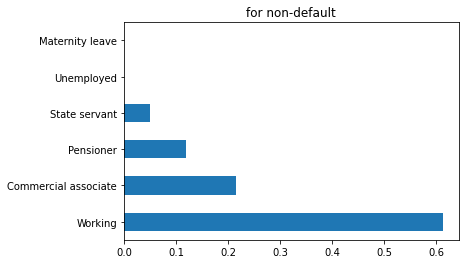

In [89]:
df0_one.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()

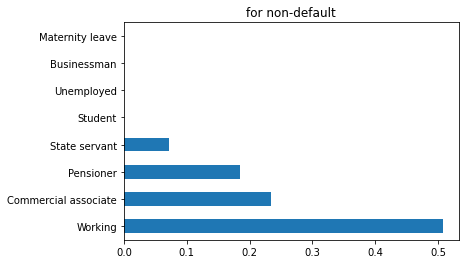

In [90]:
df0_two.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()

from above graph we can say that working people take more loans
Pensioners are high is number for the non defaulter caes. 
while incomesource and the defaulters both categories are higher in count for working people 

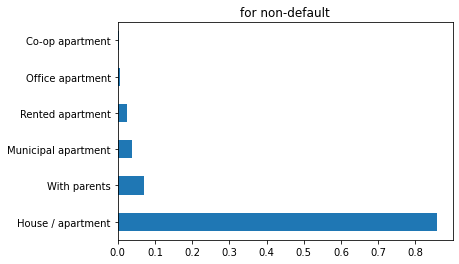

In [91]:
df0_one.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()

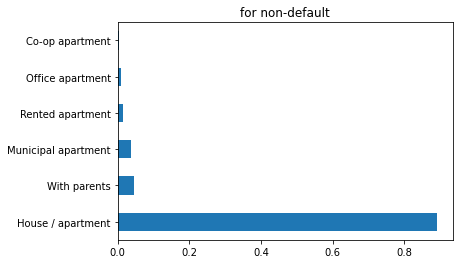

In [92]:
df0_two.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()

from above graph we can conclude that people those who have own house comes in the defaulter and non defaulter list

## Now we will compare top 10 categorical variables for both the Target data sets

In [93]:
categorical_compare =['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','AMT_CREDIT_bin','AMT_INCOME_TOTAL_bin']

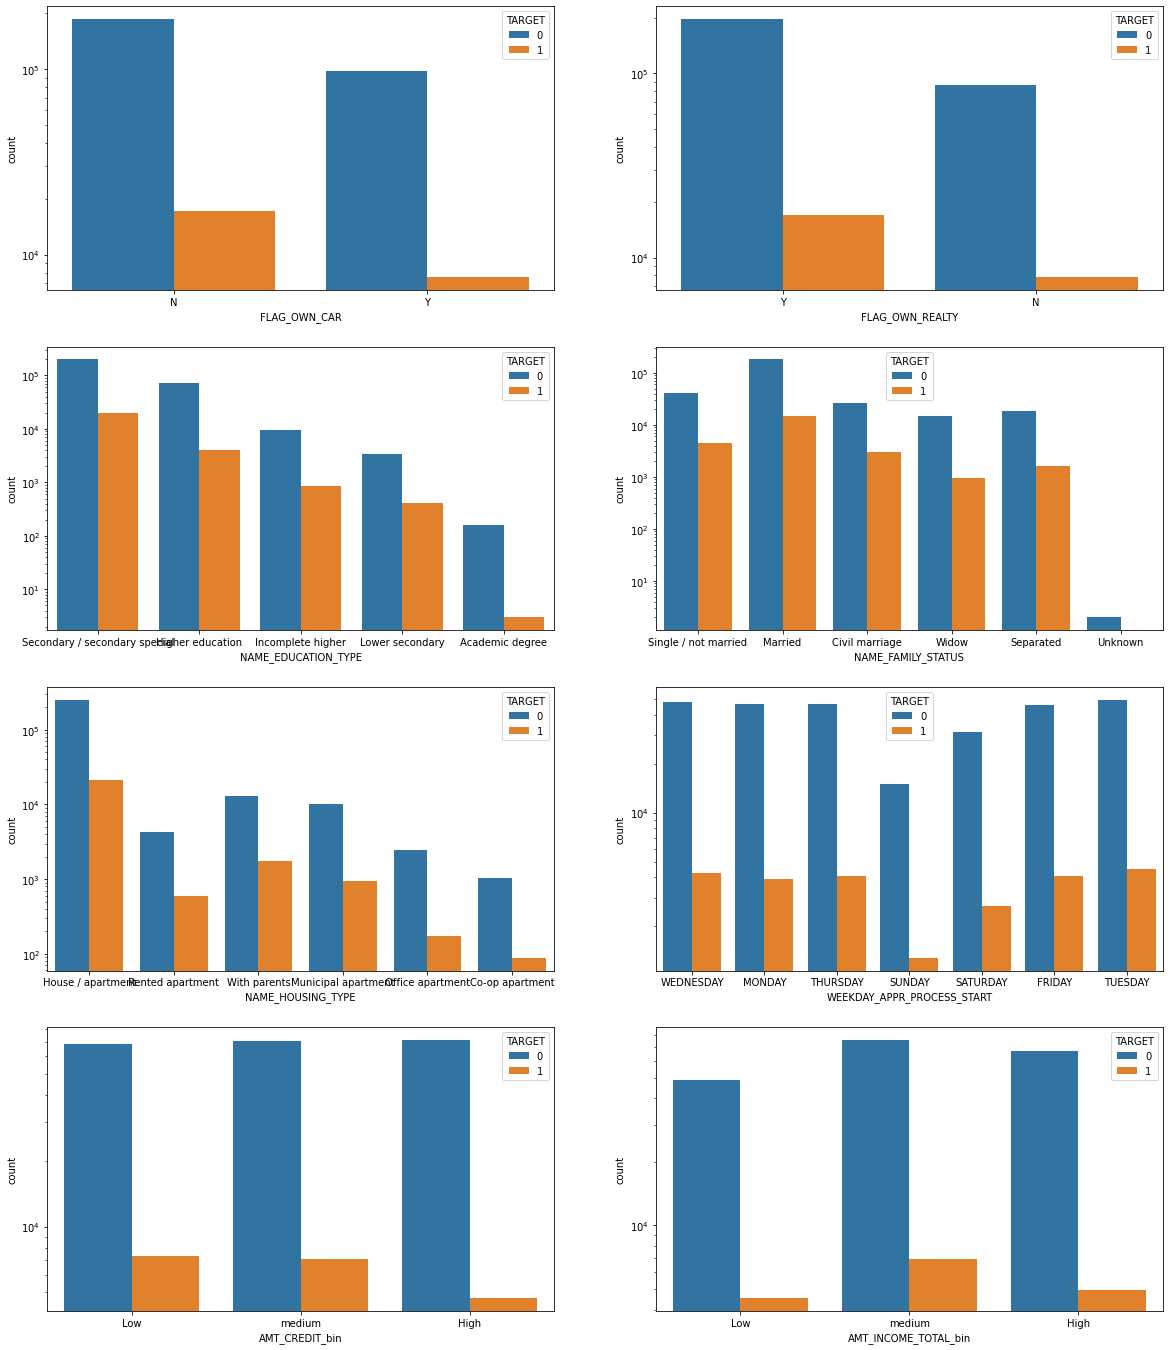

In [94]:
plt.figure(figsize=(20,24))
for i in (enumerate(categorical_compare)):
    plt.subplot(len(categorical_compare)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=df0)
    plt.yscale('log')
plt.show()

## from above analysis we can say the following observations:

1. Those who do not have any car, takes more loan and falls under the category of defaulters.
2. People with real estate tends to take more loans.    
3. People those who have secondary/secondary special education takes more loan with compare to any other education category.
4. People those who are married take more loans with compare to other marital status. 
5. On Saturday and sunday people are applying for loans in low count, so in Bank load of work is less on saturday and sunday in regards with loan applications.
6. those who have started application process on sunday are falling under the non defaulters list, It means they are sparing and dedicating time to fill the application by understanding terms and conditions.  
7. Those who comePeople with real estate tends to take more loans. s under the high credit amount category falls under the non defaulters with compare to low and medium credit.
8. People those who are having Medium total income are more likely falls under the category of defaulters with compare to high and low Total income. 


 

# Now we will compare Numerical variable for both the data set

In [95]:
Numerical_compare = ['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_BIRTH','HOUR_APPR_PROCESS_START','DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL']

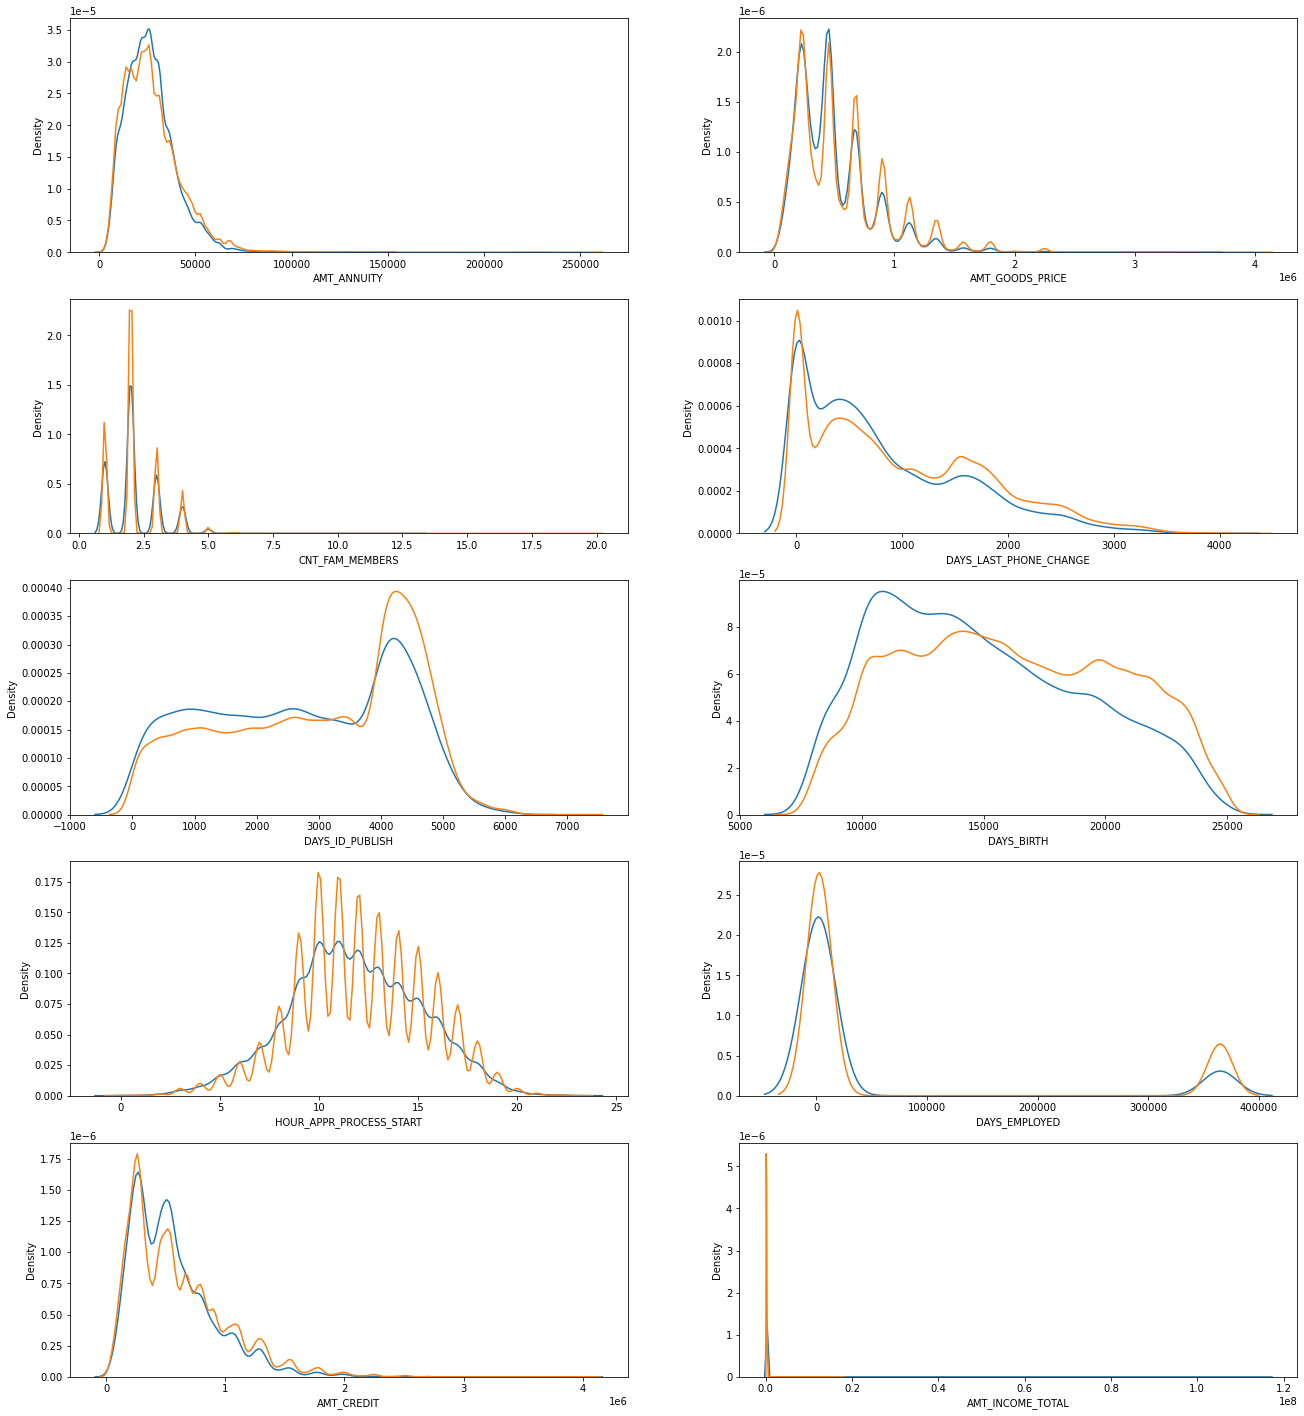

In [96]:
plt.figure(figsize=(22,25))
for i in (enumerate(Numerical_compare)):
    plt.subplot(len(Numerical_compare)//2,2,i[0]+1)
    sns.distplot(df0_one[i[1]].dropna(),hist=False,label='Target : default')
    sns.distplot(df0_two[i[1]].dropna(),hist=False,label='Target : no default')
plt.show()

## from above graphical presentation we can say about the follwing observations:
1. those who have low amount annuity, they takes high number of loans.
2. People generally take the loan for less good amounts.
3. People those who have less family members take more loans, It means nuclear families take more loans.
4. Those who falls under the age brackate of 27 years to 41 years, Takes more loans. 
5. Maximum Applications for loan gets filled in the time interval of 10 Am to 02 PM.
6. people those who joined a job recently takes more loan with compare to the prople those who are working from last many days.
7. Those who are have low Total income take more loans. 

# Correlation Analysis

In [97]:
df0_one.corr().unstack().reset_index().sort_values(by=0,ascending=False)

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,1.000000
578,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MODE,1.000000
102,AMT_CREDIT,AMT_CREDIT,1.000000
136,AMT_ANNUITY,AMT_ANNUITY,1.000000
170,AMT_GOODS_PRICE,AMT_GOODS_PRICE,1.000000
...,...,...,...
41,CNT_CHILDREN,DAYS_EMPLOYED,-0.192864
242,DAYS_BIRTH,CNT_FAM_MEMBERS,-0.203267
370,CNT_FAM_MEMBERS,DAYS_BIRTH,-0.203267
40,CNT_CHILDREN,DAYS_BIRTH,-0.259109


## We will take top 10 values of correlation for the comparaision

In [98]:
##Pull out top 10 values for df0_one data set
corr=df0_one.corr()
corrdf=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf=corrdf.unstack().reset_index()
corrdf.columns=['Var1','Var2','Coorelation']
corrdf.dropna(subset=['Coorelation'],inplace=True)
corrdf['Coorelation']=round(corrdf['Coorelation'],2)

In [99]:
corrdf['Coorelation']=abs(corrdf['Coorelation'])
corrdf.sort_values(by='Coorelation',ascending=False).head(10)

,Var1,Var2,Coorelation
642,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,1.00
676,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
610,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
678,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
168,AMT_GOODS_PRICE,AMT_CREDIT,0.98
576,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.98
644,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.98
364,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87


In [100]:
##Pull out top 10 values for df0_two data set
corr=df0_two.corr()
corrdf=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf=corrdf.unstack().reset_index()
corrdf.columns=['Var1','Var2','Coorelation']
corrdf.dropna(subset=['Coorelation'],inplace=True)
corrdf['Coorelation']=round(corrdf['Coorelation'],2)

In [101]:
corrdf['Coorelation']=abs(corrdf['Coorelation'])
corrdf.sort_values(by='Coorelation',ascending=False).head(10)

,Var1,Var2,Coorelation
676,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
678,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
168,AMT_GOODS_PRICE,AMT_CREDIT,0.99
610,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
642,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.99
576,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.97
644,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.96
364,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86


## When defaulted, major portion of decision is taken by-
(YEARS_BEGINEXPLUATATION_MEDI AND YEARS_BEGINEXPLUATATION_AVG)
(OBS_60_CNT_SOCIAL_CIRCLE AND OBS_30_CNT_SOCIAL_CIRCLE)
(FLOORSMAX_MEDI AND FLOORSMAX_AVG)

## When not defaulted, major portion of decision is taken by-
(FLOORSMAX_MEDI AND FLOORSMAX_AVG)
(OBS_60_CNT_SOCIAL_CIRCLE AND OBS_30_CNT_SOCIAL_CIRCLE)
(FLOORSMAX_MEDI AND FLOORSMAX_MODE)

the values - YEARS_BEGINEXPLUATATION_MEDI and YEARS_BEGINEXPLUATATION_AVG are more correlated in default case than non-default

# Bi-variate Analysis (first we will take categorical)

In [102]:
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low


NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       255011            27675
1                        23221             1604


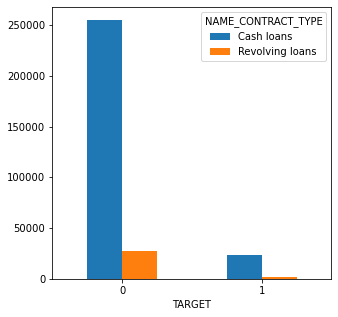

In [103]:
datagraph= pd.crosstab(index=df0['TARGET'],columns=df0['NAME_CONTRACT_TYPE'])
print(datagraph)
datagraph.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

higher number of cashloans are there 

CODE_GENDER       F      M  XNA
TARGET                         
0            188278  94404    4
1             14170  10655    0


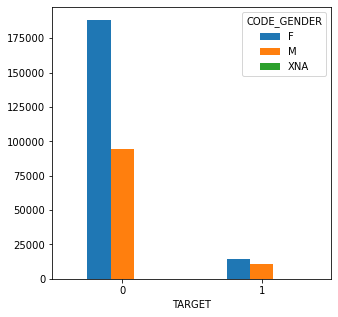

In [104]:
datagraph= pd.crosstab(index=df0['TARGET'],columns=df0['CODE_GENDER'])
print(datagraph)
datagraph.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

Female takes more loan with ccompare to male 

NAME_TYPE_SUITE  Children  Family  Group of people  Other_A  Other_B  \
TARGET                                                                 
0                    3026   37140              248      790     1596   
1                     241    3009               23       76      174   

NAME_TYPE_SUITE  Spouse, partner  Unaccompanied  
TARGET                                           
0                          10475         229411  
1                            895          20407  


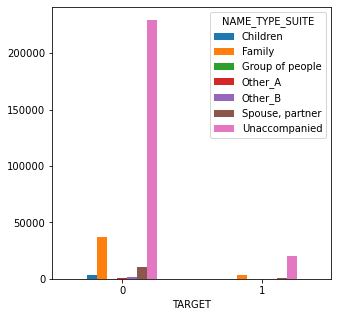

In [105]:
datagraph= pd.crosstab(index=df0['TARGET'],columns=df0['NAME_TYPE_SUITE'])
print(datagraph)
datagraph.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

most of the people visit qalone to banks while taking loan

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
TARGET                                                                 
0                          10                 66257                3   
1                           0                  5360                2   

NAME_INCOME_TYPE  Pensioner  State servant  Student  Unemployed  Working  
TARGET                                                                    
0                     52380          20454       18          14   143550  
1                      2982           1249        0           8    15224  


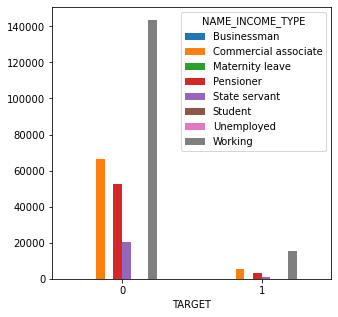

In [106]:
datagraph= pd.crosstab(index=df0['TARGET'],columns=df0['NAME_INCOME_TYPE'])
print(datagraph)
datagraph.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

working people takes more loan with compare to any other income_type group

NAME_HOUSING_TYPE  Co-op apartment  House / apartment  Municipal apartment  \
TARGET                                                                       
0                             1033             251596                10228   
1                               89              21272                  955   

NAME_HOUSING_TYPE  Office apartment  Rented apartment  With parents  
TARGET                                                               
0                              2445              4280         13104  
1                               172               601          1736  


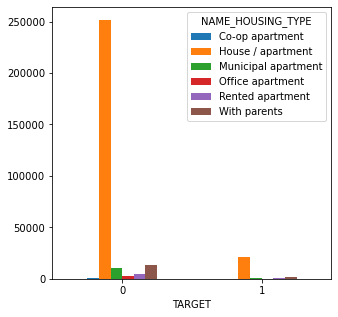

In [107]:
datagraph= pd.crosstab(index=df0['TARGET'],columns=df0['NAME_HOUSING_TYPE'])
print(datagraph)
datagraph.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

those who are habing own houses takes mpre loan with compare to any other housing_type category people

## Now we will take Numerical 

In [108]:
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low


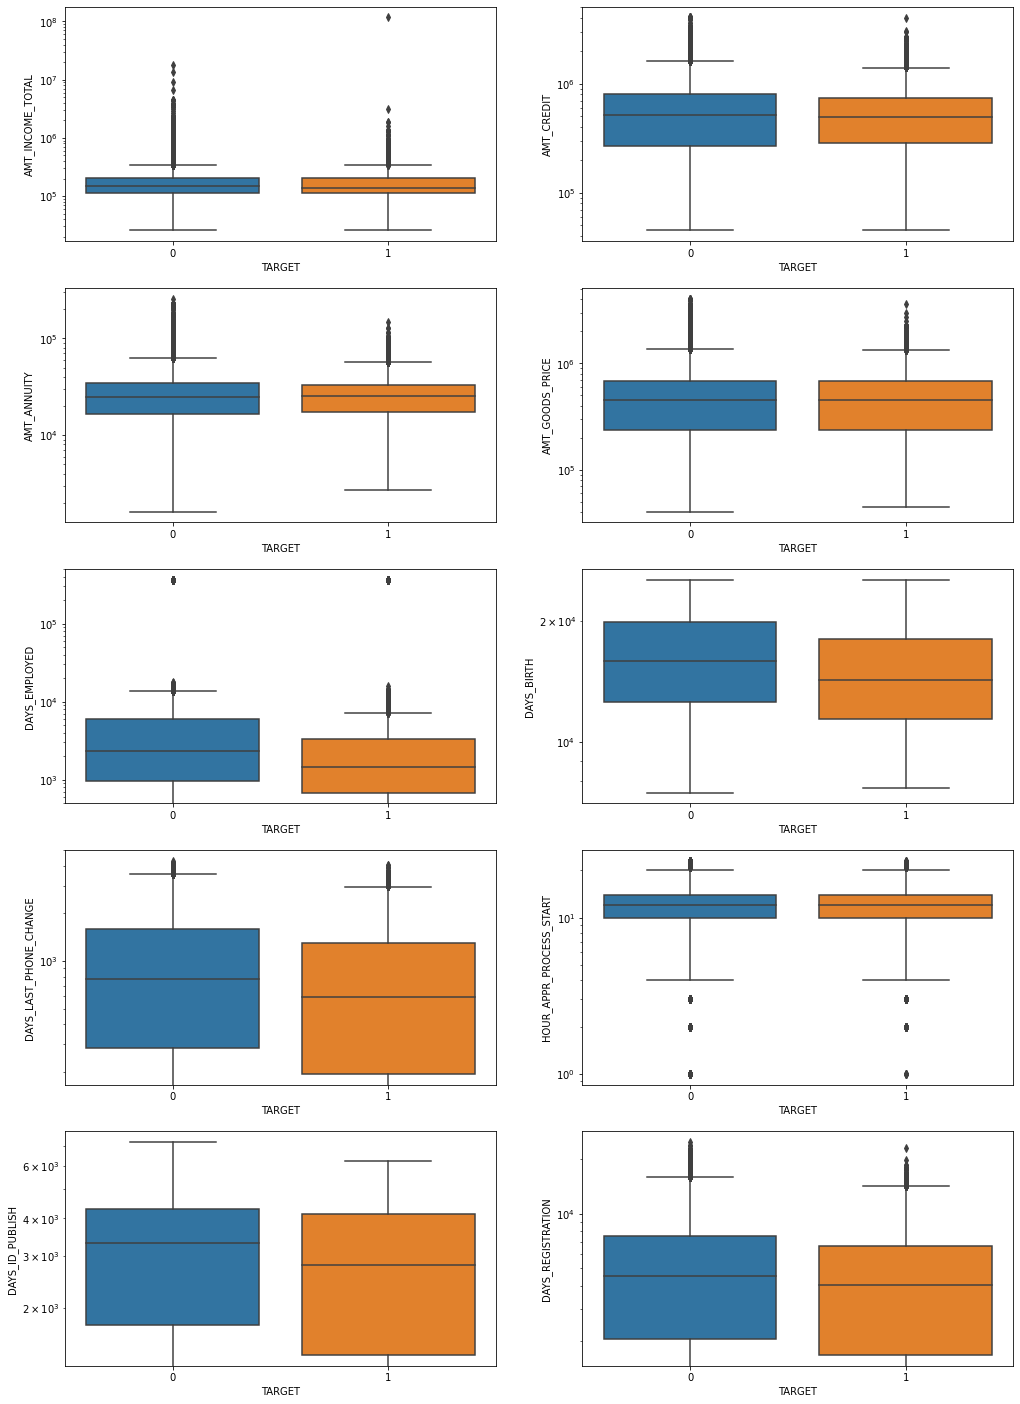

In [109]:
Numerical = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                  'DAYS_EMPLOYED','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE','HOUR_APPR_PROCESS_START',
                  'DAYS_ID_PUBLISH','DAYS_REGISTRATION']
plt.figure(figsize=(17,25))
for i in (enumerate(Numerical)):
    plt.subplot(len(Numerical)//2,2,i[0]+1)
    sns.boxplot(x='TARGET',y=df0[i[1]].dropna(),data=df0)
    plt.yscale('log')
plt.show()

1. Maximum people those who have low total income falls under the defaulter category
2. Those who are working from long time they are less in defaulters.
3. In default case, most of the clients amount annuity tends to be greater than 25000(median value).
4. Elder people are less in defaulter list
5. The application process start hours taken for default and not default cases are similar.
6. There exists more clients who changed their their registration details after 4000 days of approval of loan.
7. In non default cases, people keep their phone numbers for greater time.

# Now we will proceed with the previous data set

In [121]:
df1 = pd.read_csv("C://Users//dell//Desktop//COURSE//Data Toolkit//Credit EDA Case Study//previous_application.csv")

In [122]:
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df1.shape

(1670214, 37)

In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [125]:
df1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### We will check missing value percentage to identify the missing counts in each column


In [126]:
round((100*df1.isnull().sum()/len(df1)),5)

SK_ID_PREV                      0.00000
SK_ID_CURR                      0.00000
NAME_CONTRACT_TYPE              0.00000
AMT_ANNUITY                    22.28667
AMT_APPLICATION                 0.00000
AMT_CREDIT                      0.00006
AMT_DOWN_PAYMENT               53.63648
AMT_GOODS_PRICE                23.08177
WEEKDAY_APPR_PROCESS_START      0.00000
HOUR_APPR_PROCESS_START         0.00000
FLAG_LAST_APPL_PER_CONTRACT     0.00000
NFLAG_LAST_APPL_IN_DAY          0.00000
RATE_DOWN_PAYMENT              53.63648
RATE_INTEREST_PRIMARY          99.64370
RATE_INTEREST_PRIVILEGED       99.64370
NAME_CASH_LOAN_PURPOSE          0.00000
NAME_CONTRACT_STATUS            0.00000
DAYS_DECISION                   0.00000
NAME_PAYMENT_TYPE               0.00000
CODE_REJECT_REASON              0.00000
NAME_TYPE_SUITE                49.11975
NAME_CLIENT_TYPE                0.00000
NAME_GOODS_CATEGORY             0.00000
NAME_PORTFOLIO                  0.00000
NAME_PRODUCT_TYPE               0.00000


## We have already decided our threshold value as 50%, so we will remove the columns those having >=50% missing counts

In [127]:
df1 = df1.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [128]:
##Some columns hav negative values which is incorrect according to their data types so will convert in positive 

In [129]:
df1['DAYS_DECISION'] = df1['DAYS_DECISION'].abs()
df1['SELLERPLACE_AREA'] = df1['SELLERPLACE_AREA'].abs()
df1['DAYS_FIRST_DUE'] = df1['DAYS_FIRST_DUE'].abs()
df1['DAYS_LAST_DUE_1ST_VERSION'] = df1['DAYS_LAST_DUE_1ST_VERSION'].abs()
df1['DAYS_LAST_DUE'] = df1['DAYS_LAST_DUE'].abs()
df1['DAYS_TERMINATION'] = df1['DAYS_TERMINATION'].abs()
df1['DAYS_FIRST_DRAWING'] = df1['DAYS_FIRST_DRAWING'].abs()

No we will analyse some of the values 

In [130]:
df1.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

<AxesSubplot:>

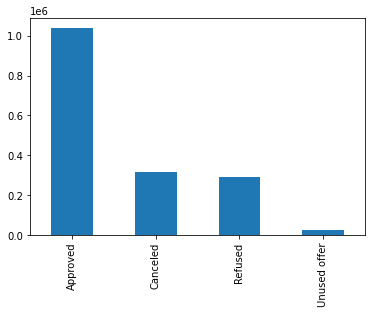

In [131]:
df1.NAME_CONTRACT_STATUS.value_counts().plot.bar()

## Now we will merge both the data set and perform the analysis

In [138]:
final_df = pd.merge(df0,df1, how ='left', on ='SK_ID_CURR', suffixes = ('_Current', '_Previous'))

In [139]:
final_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_Current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY_Current,AMT_GOODS_PRICE_Current,NAME_TYPE_SUITE_Current,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_Current,HOUR_APPR_PROCESS_START_Current,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin,SK_ID_PREV,NAME_CONTRACT_TYPE_Previous,AMT_ANNUITY_Previous,AMT_APPLICATION,AMT_CREDIT_Previous,AMT_GOODS_PRICE_Previous,WEEKDAY_APPR_PROCESS_START_Previous,HOUR_APPR_PROCESS_START_Previous,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_Previous,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium,Low,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17

## Now we got the final data set, We will perform univariate, bivariate analysis

In [134]:
#Univariate categorical analysis
final_categorical = ['NAME_CONTRACT_TYPE_Current','NAME_CONTRACT_TYPE_Previous','NAME_TYPE_SUITE_Current','NAME_TYPE_SUITE_Previous','WEEKDAY_APPR_PROCESS_START_Current','WEEKDAY_APPR_PROCESS_START_Previous','AMT_INCOME_TOTAL_bin','AMT_CREDIT_bin','NAME_YIELD_GROUP','NAME_CLIENT_TYPE']

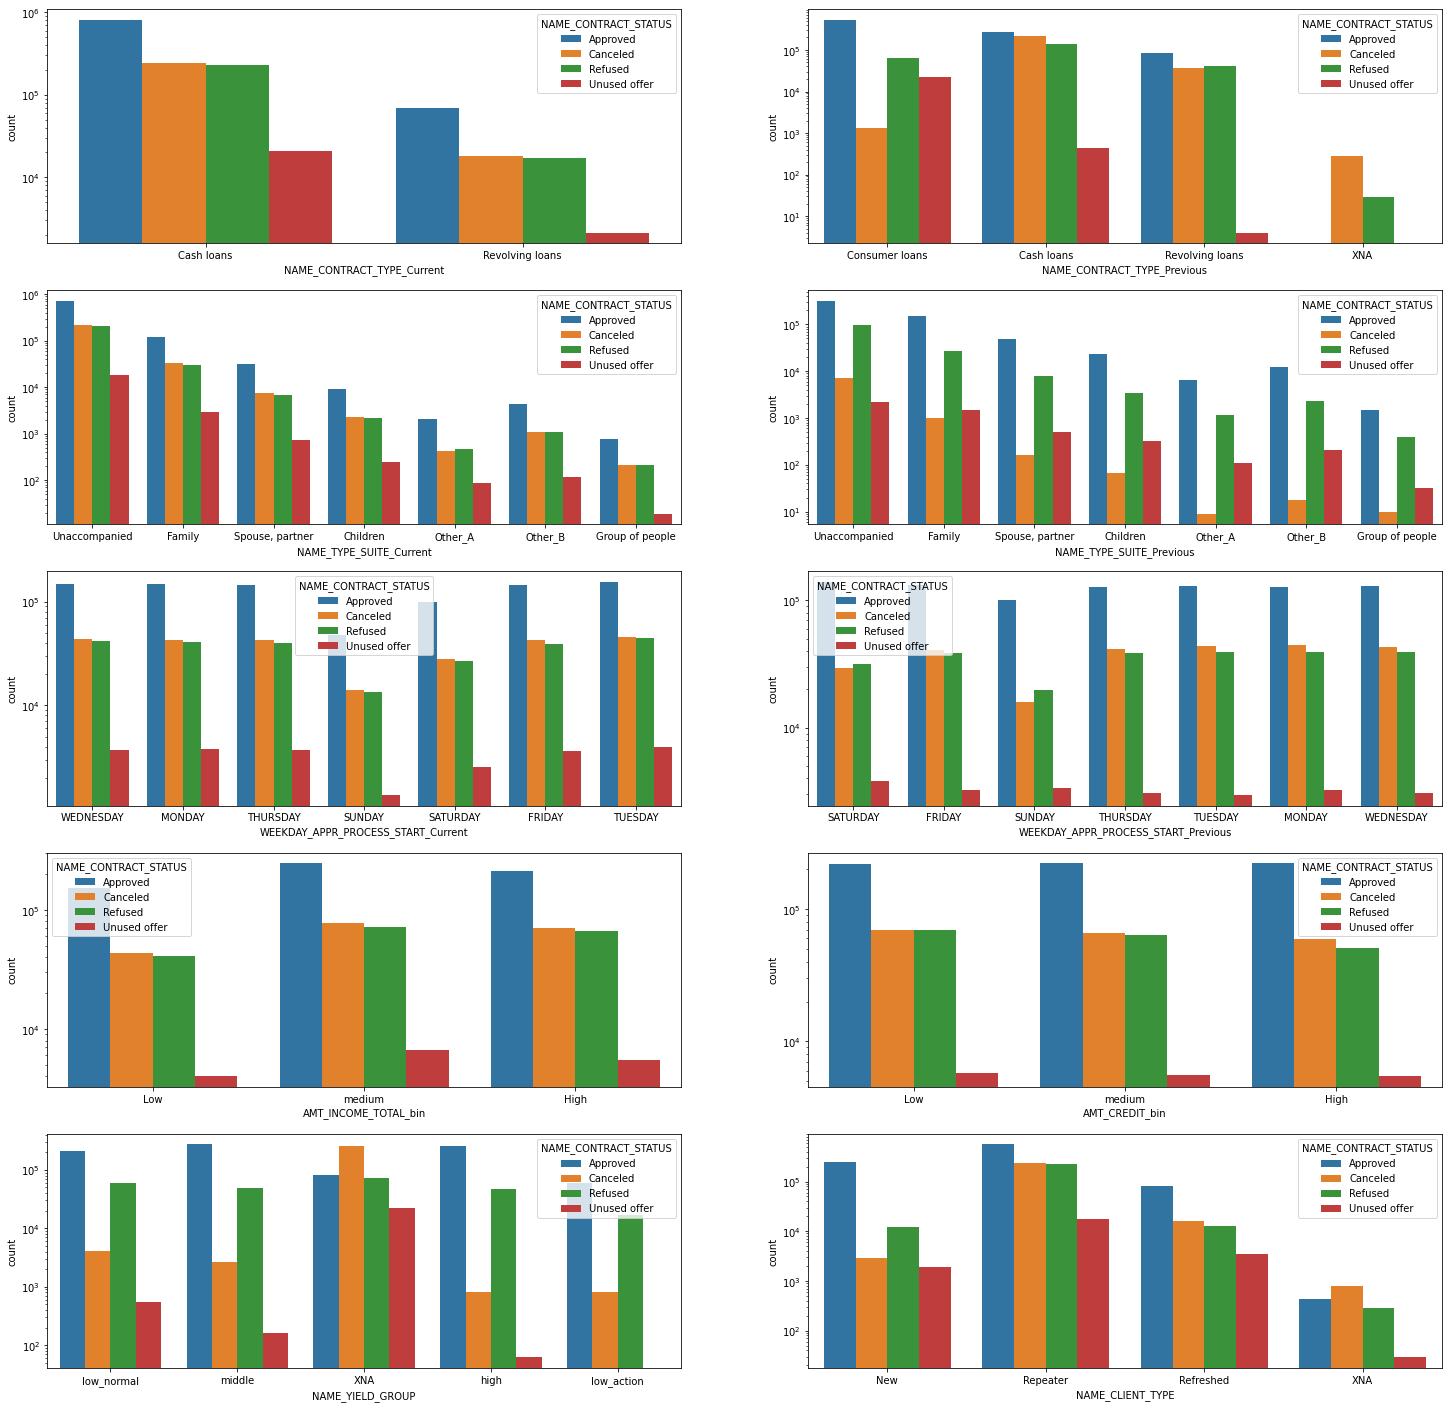

In [135]:
plt.figure(figsize=(25,25))
for i in (enumerate(final_categorical)):
    plt.subplot(len(final_categorical)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=final_df)
    plt.yscale('log')
    
plt.show()

1. Previously consumer loans were approved in high number while currently cash loans are high in number.
2. Previously banks were providint three types of loan, consumer cash and revolving loans but currently only cash and revolving loans are there. 
3. In both current and previous data, maximum people comes alone to bank for applying loan(unaccompanied).
4. previously saturday has the highest approval rate for loans while currently tuesday has the highest rate of approval.
5. For medium income level, approval rate is high. 
6. Amongs all the client_type category, repetater has the high number of approvals for the loans. 


## Now we will proceed with the numerical variable analysis

In [136]:
final_numerical = ['AMT_CREDIT_Previous','AMT_CREDIT_Current','AMT_ANNUITY_Current','AMT_ANNUITY_Previous','AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN', 'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current']

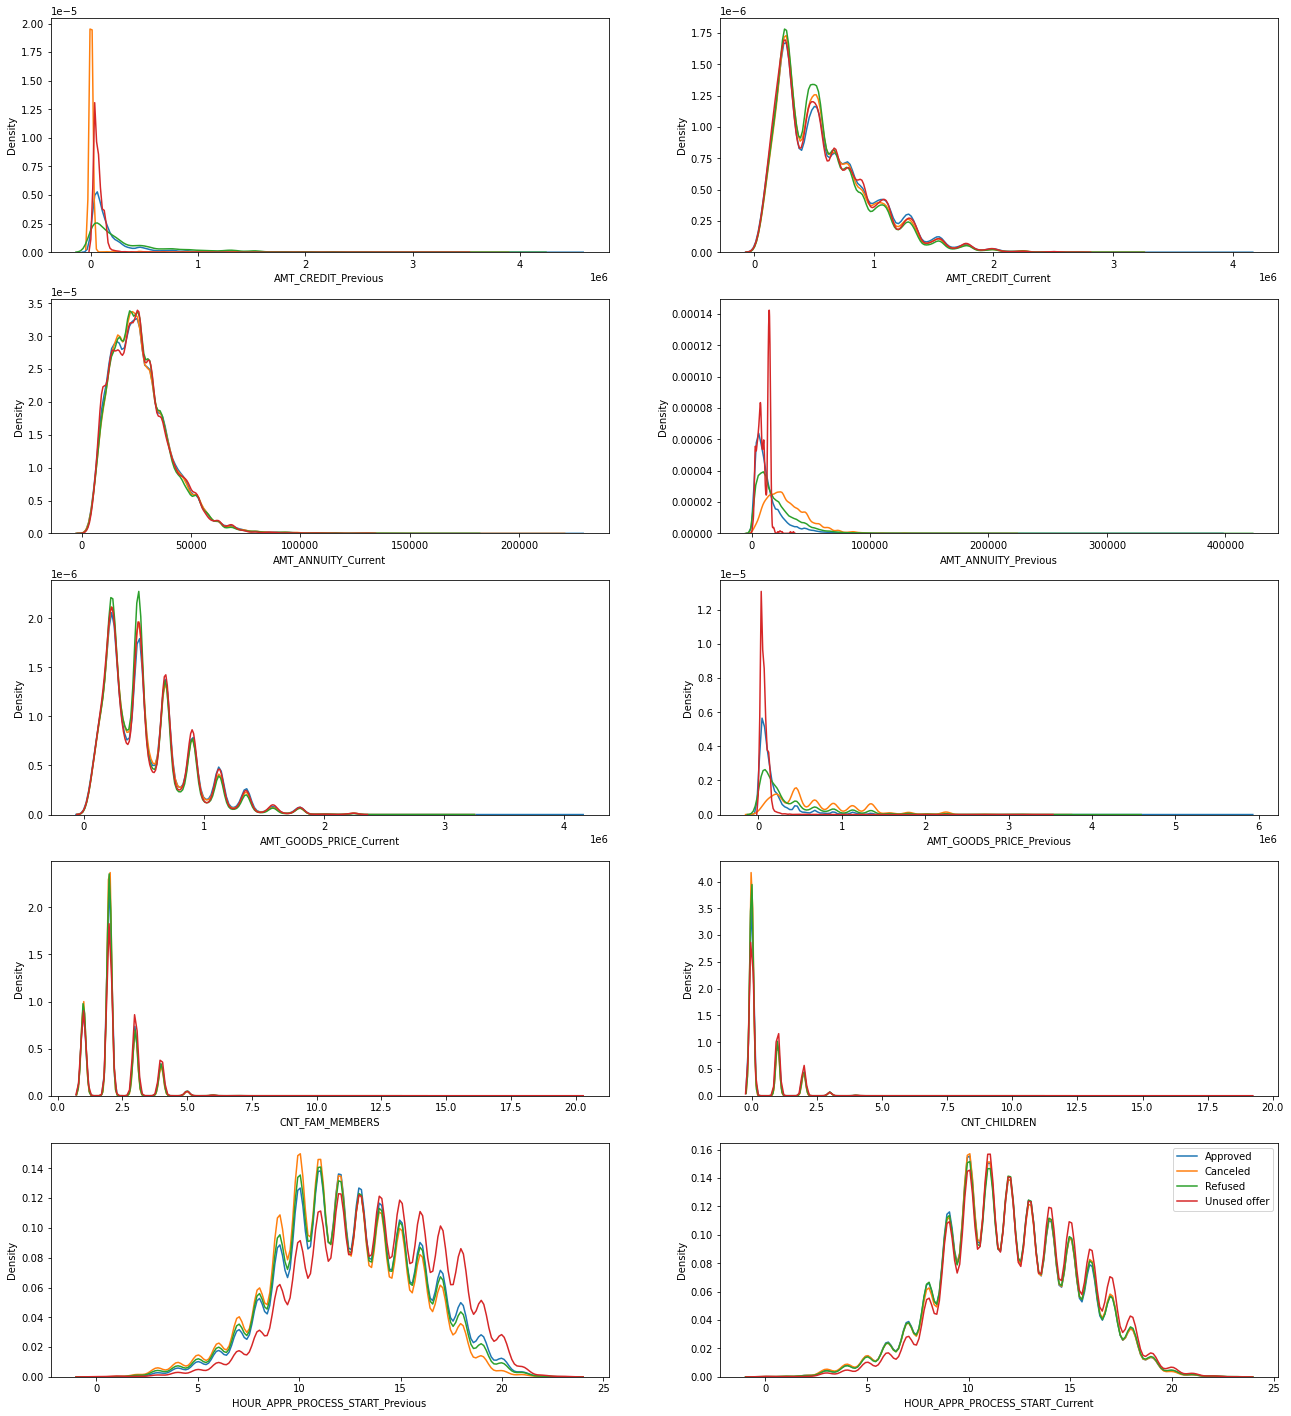

In [142]:
plt.figure(figsize=(22,25))
for i in (enumerate(final_numerical)):
    plt.subplot(len(final_numerical)//2,2,i[0]+1)    
    sns.distplot(final_df.loc[final_df.NAME_CONTRACT_STATUS=='Approved',:][i[1]].dropna(),hist=False,label='Approved', kde_kws={'bw':0.1})
    sns.distplot(final_df.loc[final_df.NAME_CONTRACT_STATUS=='Canceled',:][i[1]].dropna(),hist=False,label='Canceled',kde_kws={'bw':0.1})
    sns.distplot(final_df.loc[final_df.NAME_CONTRACT_STATUS=='Refused',:][i[1]].dropna(),hist=False,label='Refused',kde_kws={'bw':0.1})
    sns.distplot(final_df.loc[final_df.NAME_CONTRACT_STATUS=='Unused offer',:][i[1]].dropna(),hist=False,label='Unused offer',kde_kws={'bw':0.1})
plt.legend()  
plt.show()

1. for amount credit, previously canceled was more, in current refused are in high number.
2. For annuity, previously unused was more while in current cancelled and refused are more.
3. Previously bank had high unused offers but currently refused is high incase of AMT_GOODS_PRICE.
4. Those who are having less family members are taking more loans.
6. Busiest hours for bank is 09 am to 2 Pm for bank loans.
7. MAximum number of application has been filled in between 9 am to 2 pm.


NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        816571            69528
Canceled                        241552            17889
Refused                         228351            17039
Unused offer                     20641             2130


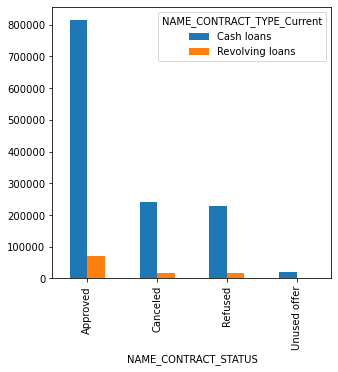

In [144]:
Bicat_data= pd.crosstab(index=final_df['NAME_CONTRACT_STATUS'],columns=final_df['NAME_CONTRACT_TYPE_Current'])
print(Bicat_data)
Bicat_data.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

In the loan approval decision, cash loans approved more than revolving loan.

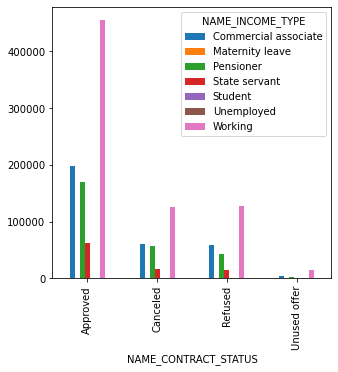

In [147]:
Bicat_data= pd.crosstab(index=final_df['NAME_CONTRACT_STATUS'],columns=final_df['NAME_INCOME_TYPE'])
Bicat_data.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

Highest number of loan approval for the working people, than commercial associate and pensioners. least approval for the state servents.

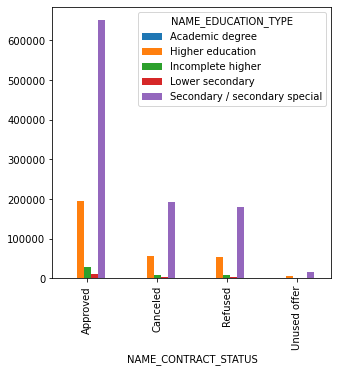

In [149]:
Bicat_data= pd.crosstab(index=final_df['NAME_CONTRACT_STATUS'],columns=final_df['NAME_EDUCATION_TYPE'])
Bicat_data.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

Those who are having secondary/ secondary special education level gets loan approval more than any other education level.

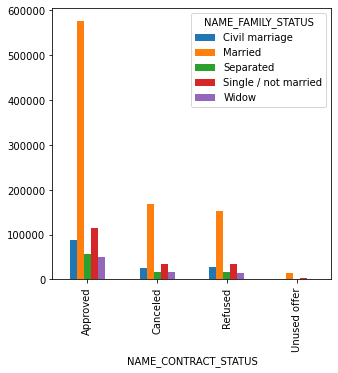

In [151]:
Bicat_data= pd.crosstab(index=final_df['NAME_CONTRACT_STATUS'],columns=final_df['NAME_FAMILY_STATUS'])
Bicat_data.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

For Married applicant more loan approval is there then any other marital status

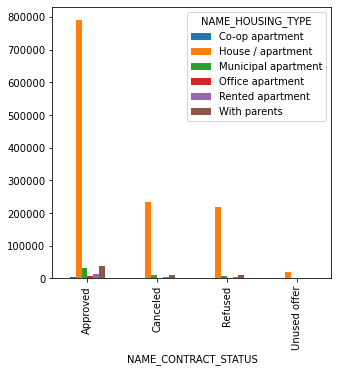

In [152]:
Bicat_data= pd.crosstab(index=final_df['NAME_CONTRACT_STATUS'],columns=final_df['NAME_HOUSING_TYPE'])
Bicat_data.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

those who are having more approvals those who have their own houses for security reasons may be

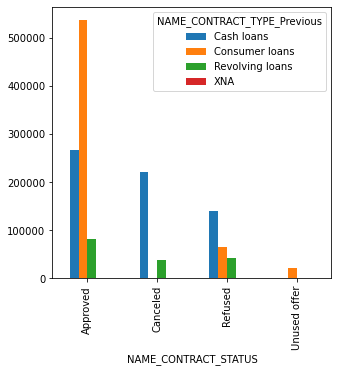

In [154]:
Bicat_data= pd.crosstab(index=final_df['NAME_CONTRACT_STATUS'],columns=final_df['NAME_CONTRACT_TYPE_Previous'])
Bicat_data.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

highest number of approval for consumer loans previously

In [5]:
Bicat_data= pd.crosstab(index=final_df['NAME_CONTRACT_STATUS'],columns=final_df['NAME_CLIENT_TYPE'])
Bicat_data.plot(kind="bar", figsize=(4,7),stacked=False)
plt.show()

NameError: name 'final_df' is not defined

Mostly, repeater application got approved for again loan grant. 

# Final Numerical Analysis 

In [158]:
FinalBi_Numerical=['AMT_ANNUITY_Current','AMT_ANNUITY_Previous','AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN','HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current', 'AMT_CREDIT_Current','AMT_CREDIT_Previous']

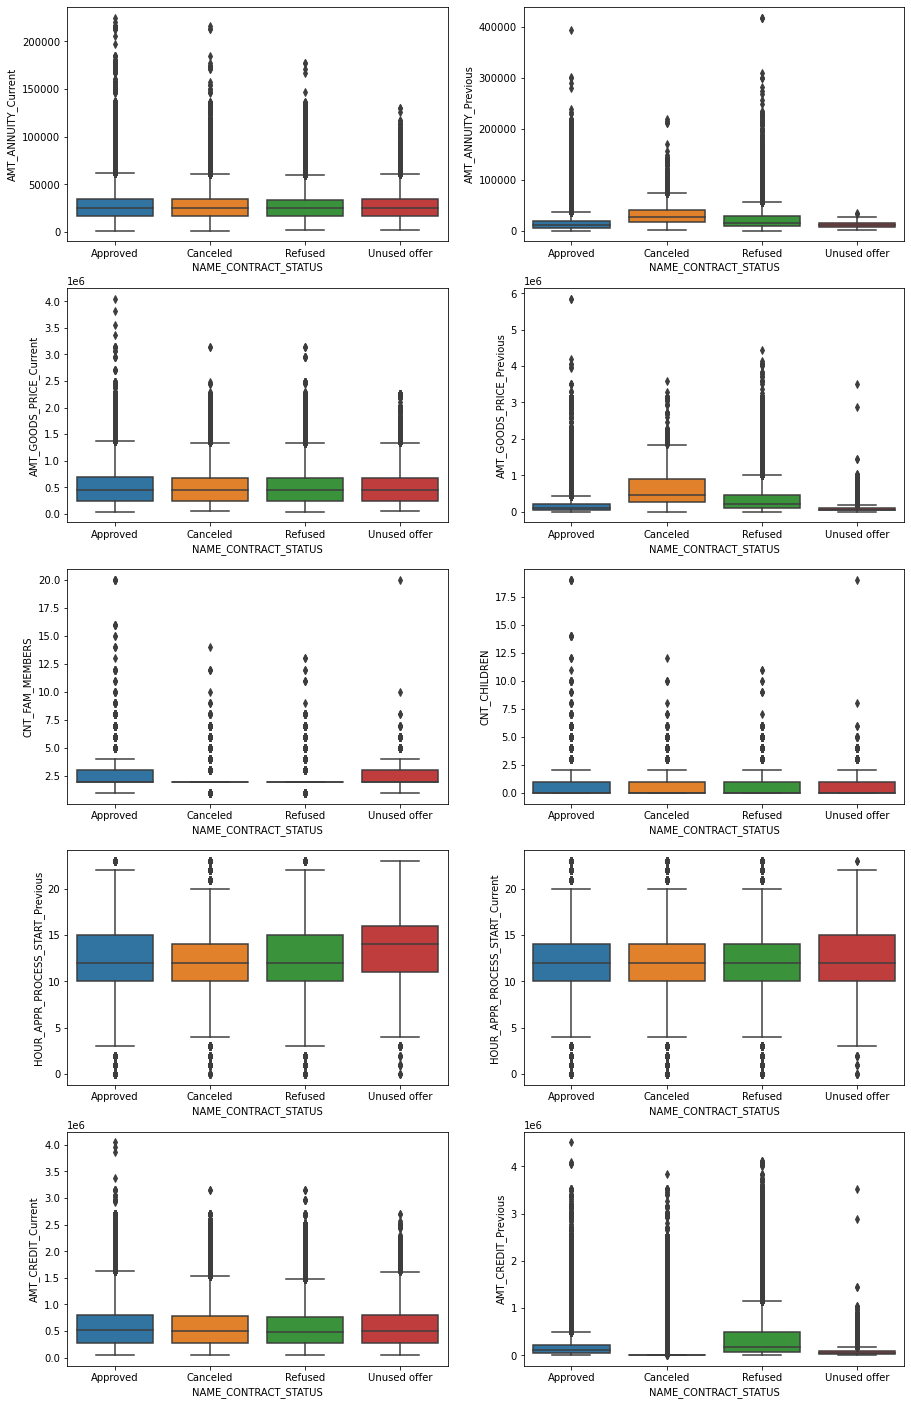

In [161]:
plt.figure(figsize=(15,25))
for i in (enumerate(FinalBi_Numerical)):
    plt.subplot(len(FinalBi_Numerical)//2,2,i[0]+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS',y=final_df[i[1]].dropna(),data=final_df)
plt.show() 

1. all the approval categories are same for the annuity. 
2. Previously most of the application were cancelled and refused.
3. but now Refused/Cancelled/Approved/Unused all four have similar situation for AMT_GOODS_PRICE.
4. Less family members got more approval. 
5. So bank should reduce time spent on unused offer.
6. time spent in unused offer is higher as compared to other categories.
7. previously amount credit was highest refused but currently.
8. currently amount credit is same for the all 4 cases. 

Conclusion

Target variable for Application dataset - TARGET
Target variable for Previous dataset - NAME_CONTRACT_STATUS

I have analysed the complete dataset and after analysing the data set I got following observations:

1. Less family members got more approval.9
2. Mostly, repeater application got approved for again loan grant. 
3. For Married applicant more loan approval is there then any other marital status
4. Those who are having secondary/ secondary special education level gets loan approval more than any other education level.
5. Highest number of loan approval for the working people, than commercial associate and pensioners. least approval for the state servents.
6. from above graph we can say that working people take more loans Pensioners are high is number for the non defaulter caes. while incomesource and the defaulters both categories are higher in count for working people
7. Those who do not have any car, takes more loan and falls under the category of defaulters.
8. Those who falls under the age brackate of 27 years to 41 years, Takes more loans
9.  People those who are having Medium total income are more likely falls under the category of defaulters with compare to high and low Total income. 

    